In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [3]:
nx = 640
ny = 360

In [4]:
generator = image_util.ImageDataProvider(search_path='training_data/*.tiff')

Number of files used: 40


In [15]:
x_test, y_test = generator(10)

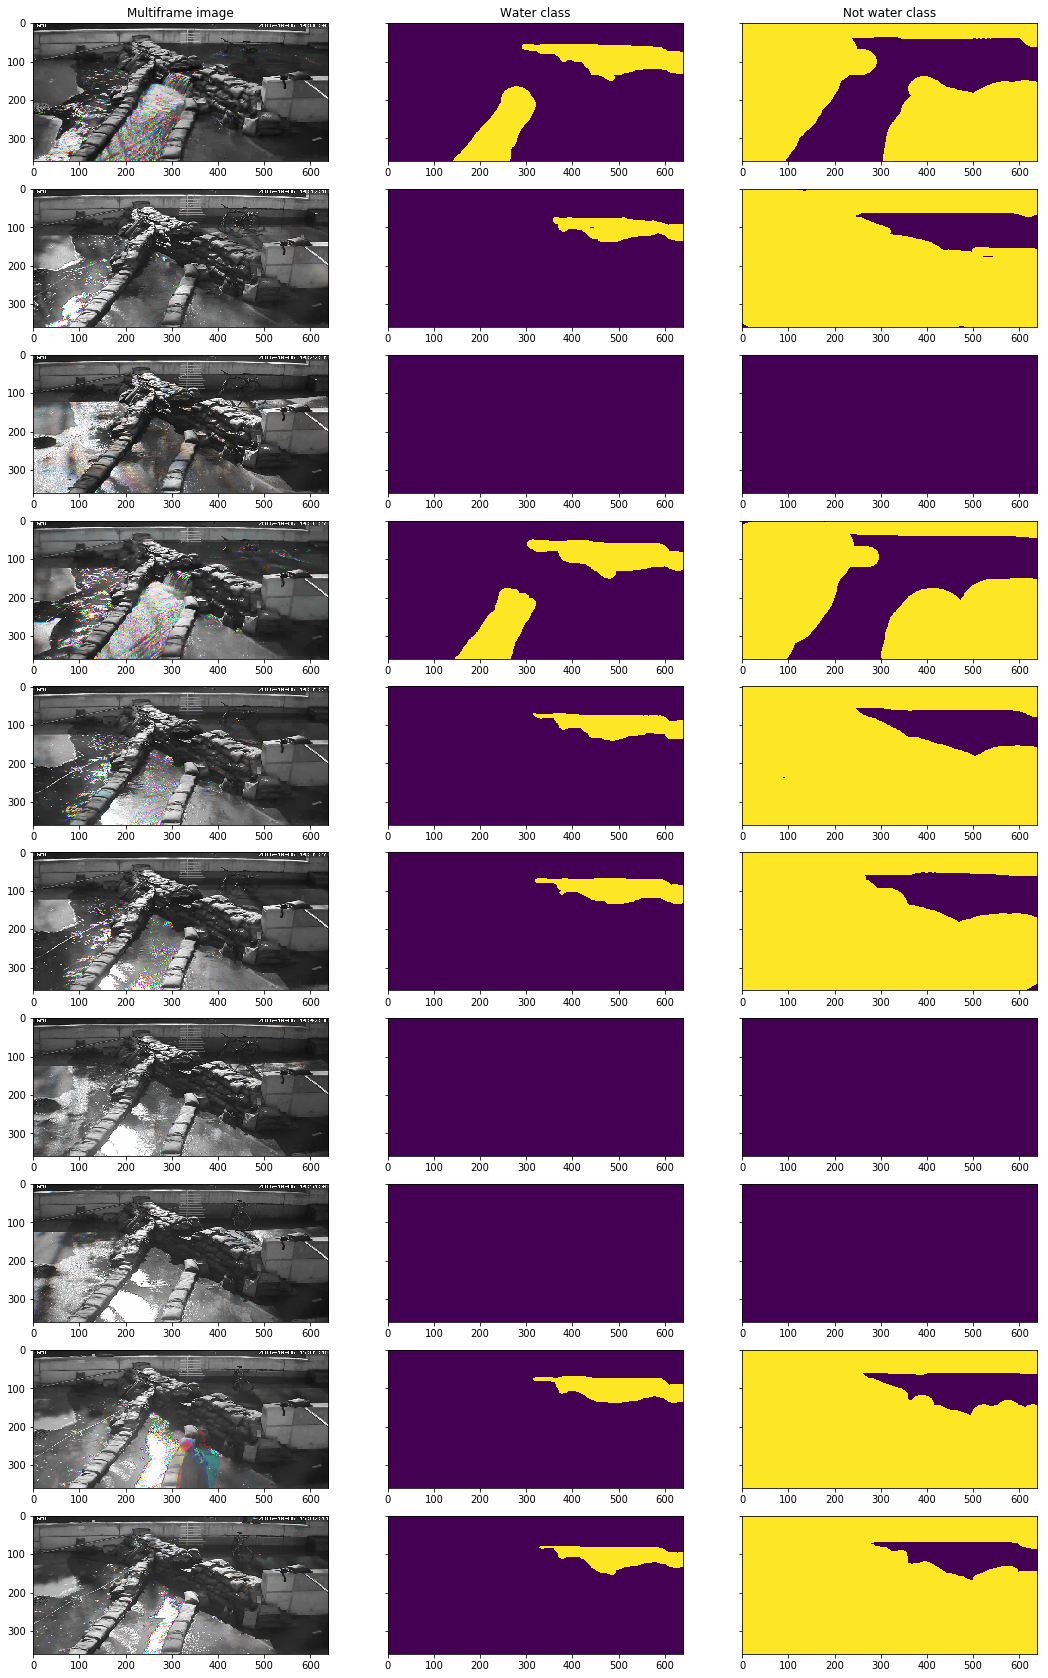

In [16]:
fig, ax = plt.subplots(10,3, sharey=True, figsize=(18,30))
ax[0,0].set_title('Multiframe image')
ax[0,1].set_title('Water class')
ax[0,2].set_title('Not water class')
for i in range(0,10):
    ax[i,0].imshow(x_test[i,...], aspect="auto")
    ax[i,1].imshow(y_test[i,...,0], aspect="auto")
    ax[i,2].imshow(y_test[i,...,1], aspect="auto")

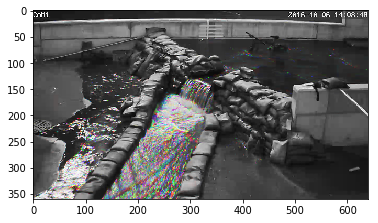

In [17]:
plt.imshow(x_test[0,...])

In [28]:
net = unet.Unet(channels=3, n_class=2, layers=4, features_root=16, cost_kwargs=dict(class_weights=[4,1]))

2017-08-03 15:52:29,686 Layers 4, features 16, filter size 3x3, pool size: 2x2


In [29]:
trainer = unet.Trainer(net, optimizer="adam")

In [30]:
path = trainer.train(generator, "./unet_trained", training_iters=100, epochs=40, display_step=25, restore=False, write_graph=True)

2017-08-03 15:52:32,599 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-08-03 15:52:32,612 Removing 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\unet_trained'
2017-08-03 15:52:32,629 Allocating 'Q:\Abteilungsprojekte\eng\SWWData\Matthew\Workspace\watsen_unet\demo\water_level\prediction'
2017-08-03 15:52:35,400 Verification error= 76.8%, loss= 0.7204
2017-08-03 15:52:38,800 Start optimization
2017-08-03 15:52:39,387 Iter 0, Minibatch Loss= 0.9040, Training Accuracy= 0.8606, Minibatch error= 14.1%
2017-08-03 15:52:45,808 Iter 25, Minibatch Loss= 0.6893, Training Accuracy= 0.9210, Minibatch error= 13.8%
2017-08-03 15:52:50,873 Iter 50, Minibatch Loss= 0.3919, Training Accuracy= 1.0000, Minibatch error= 0.0%
2017-08-03 15:52:55,669 Iter 75, Minibatch Loss= 0.6409, Training Accuracy= 0.9268, Minibatch error= 11.0%
2017-08-03 15:53:01,762 Epoch 0, Average loss: 0.6811, learning rate: 0.0010
2017-

2017-08-03 16:01:26,252 Iter 1375, Minibatch Loss= 0.2685, Training Accuracy= 1.0000, Minibatch error= 0.0%
2017-08-03 16:01:37,447 Epoch 13, Average loss: 0.6191, learning rate: 0.0010
2017-08-03 16:01:37,565 Verification error= 3.7%, loss= 0.3574
2017-08-03 16:01:48,130 Iter 1400, Minibatch Loss= 0.8032, Training Accuracy= 0.8943, Minibatch error= 10.7%
2017-08-03 16:01:59,910 Iter 1425, Minibatch Loss= 0.6749, Training Accuracy= 0.9210, Minibatch error= 13.8%
2017-08-03 16:02:12,028 Iter 1450, Minibatch Loss= 0.2710, Training Accuracy= 1.0000, Minibatch error= 0.0%
2017-08-03 16:02:23,845 Iter 1475, Minibatch Loss= 0.6158, Training Accuracy= 0.9268, Minibatch error= 11.0%
2017-08-03 16:02:35,160 Epoch 14, Average loss: 0.6166, learning rate: 0.0010
2017-08-03 16:02:35,278 Verification error= 3.7%, loss= 0.3353
2017-08-03 16:02:45,640 Iter 1500, Minibatch Loss= 0.2962, Training Accuracy= 1.0000, Minibatch error= 0.0%
2017-08-03 16:02:58,030 Iter 1525, Minibatch Loss= 1.2463, Training

2017-08-03 16:17:26,563 Verification error= 24.2%, loss= 0.3742
2017-08-03 16:17:42,384 Iter 2800, Minibatch Loss= 0.6780, Training Accuracy= 0.7703, Minibatch error= 23.1%
2017-08-03 16:17:58,700 Iter 2825, Minibatch Loss= 0.5984, Training Accuracy= 0.9183, Minibatch error= 13.6%
2017-08-03 16:18:15,223 Iter 2850, Minibatch Loss= 0.2595, Training Accuracy= 0.9754, Minibatch error= 2.5%
2017-08-03 16:18:31,703 Iter 2875, Minibatch Loss= 0.3905, Training Accuracy= 0.8443, Minibatch error= 17.7%
2017-08-03 16:18:47,424 Epoch 28, Average loss: 0.4860, learning rate: 0.0010
2017-08-03 16:18:47,538 Verification error= 11.5%, loss= 0.3228
2017-08-03 16:19:02,768 Iter 2900, Minibatch Loss= 0.2572, Training Accuracy= 0.9330, Minibatch error= 6.7%
2017-08-03 16:19:19,599 Iter 2925, Minibatch Loss= 1.1701, Training Accuracy= 0.8011, Minibatch error= 34.0%
2017-08-03 16:19:36,267 Iter 2950, Minibatch Loss= 0.6712, Training Accuracy= 0.7593, Minibatch error= 27.8%
2017-08-03 16:19:53,076 Iter 2975

In [31]:
x_test, y_test = generator(9)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-08-03 16:36:06,151 Restoring parameters from ./unet_trained/model.cpkt
2017-08-03 16:36:07,721 Model restored from file: ./unet_trained/model.cpkt


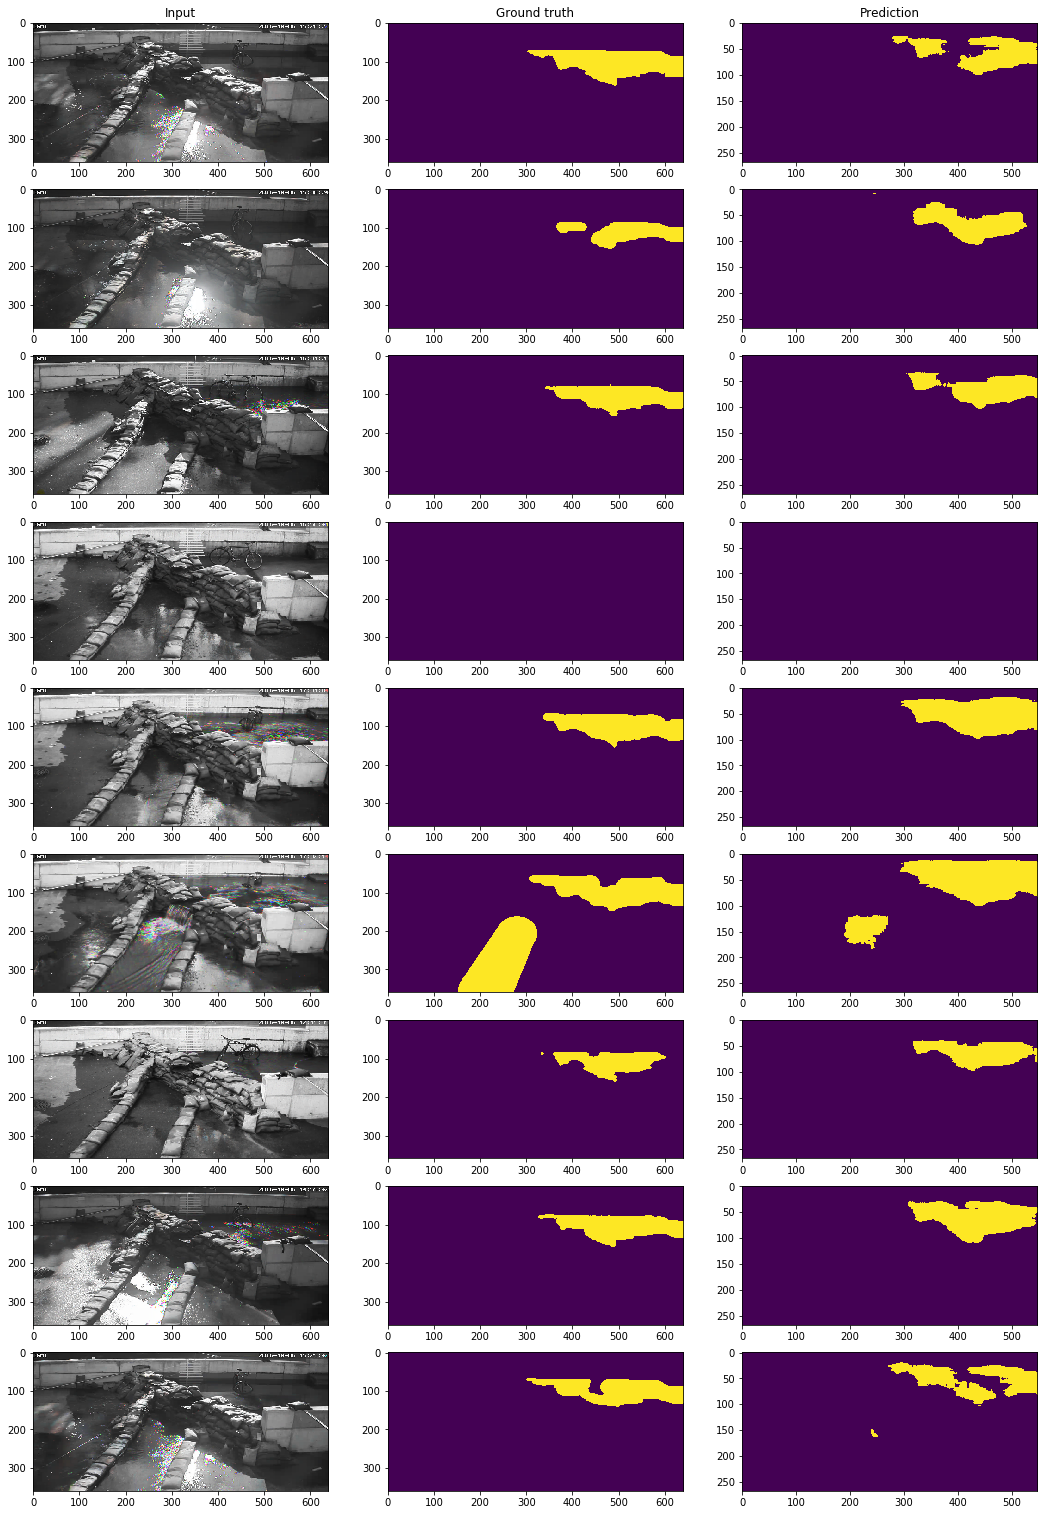

In [32]:
fig, ax = plt.subplots(9, 3, sharex=False, sharey=False, figsize=(18,27))
for i in range(0,9):
    ax[i, 0].imshow(x_test[i,...], aspect="auto")
    ax[i, 1].imshow(y_test[i,...,0], aspect="auto")
    mask = prediction[i,...,0]>0.9
    ax[i, 2].imshow(mask, aspect="auto")
ax[0,0].set_title("Input")
ax[0,1].set_title("Ground truth")
ax[0,2].set_title("Prediction")

In [33]:
generator_test = image_util.ImageDataProvider(search_path='F:/MOY_PhD_DATA_LOCAL/2017_watsen/data/frames_large/*')
x_test, y_test = generator_test(10)

prediction = net.predict("./unet_trained/model.cpkt", x_test)

Number of files used: 1055
INFO:tensorflow:Restoring parameters from ./unet_trained/model.cpkt


2017-08-03 16:36:24,846 Restoring parameters from ./unet_trained/model.cpkt
2017-08-03 16:36:26,460 Model restored from file: ./unet_trained/model.cpkt


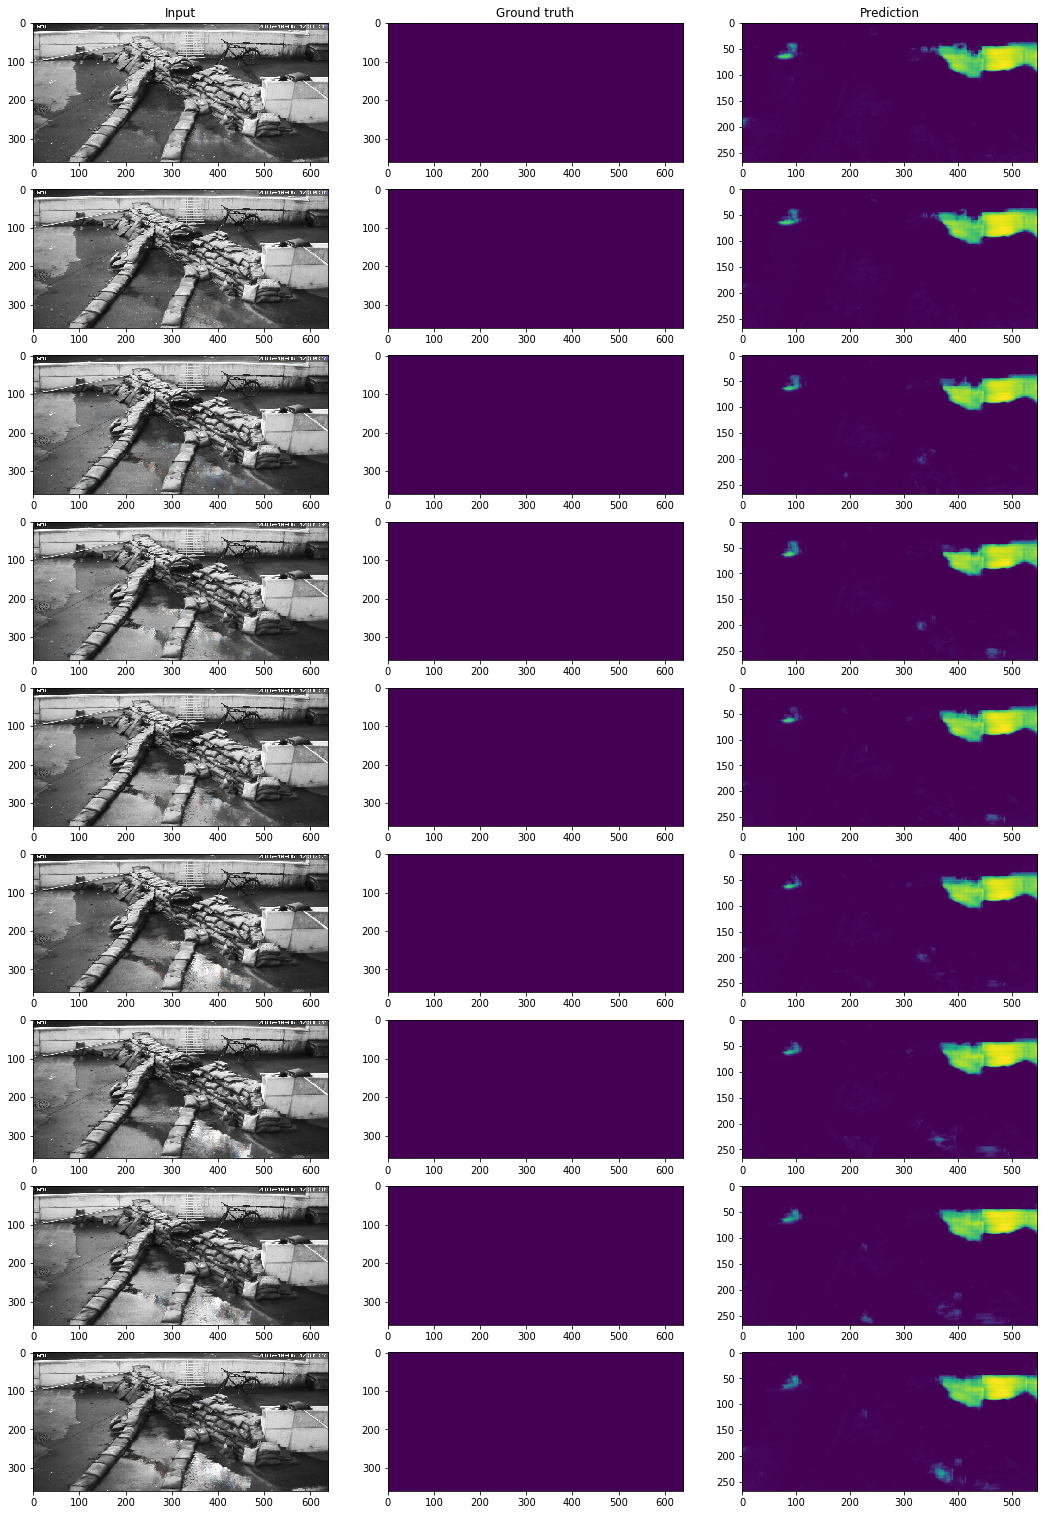

In [38]:
fig, ax = plt.subplots(9, 3, sharex=False, sharey=False, figsize=(18,27))
for i in range(0,9):
    ax[i, 0].imshow(x_test[i,...], aspect="auto")
    ax[i, 1].imshow(y_test[i,...,0], aspect="auto")
    mask = prediction[i,...,0]
    ax[i, 2].imshow(mask, aspect="auto")
ax[0,0].set_title("Input")
ax[0,1].set_title("Ground truth")
ax[0,2].set_title("Prediction")